# Week 3.1 Audio Features and Spotify Playlists 

For the second part of this week's lecture we are going to look at 

* The audio features that``Spotify's API`` will give us about **any track in its collection**


* How these can be used to make recommendations based on song similarity 


First we need to install the ``spotipy`` library. The Spotify API is just a ``REST API`` like we might have seen before, so we could access using the ``request`` library ourselves, but this just wraps up some stuff nicely for us!

In [18]:
## Install library 
!pip install spotipy

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [20]:
##These relate to an App on my developer account at Spotify and are used for authentication 
SPOTIPY_CLIENT_ID='4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET='75fa035f5a0b47b7868e69a93ef878b4'

In [21]:
##First we authenticate
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

### Pick a playlist 

Now we need to pick a playlist to get some audio features for. 

To get the ``id``, sign into the [Spotify Web Player](https://open.spotify.com/) in your browser. When you have chosen a playlist (can be one of yours, or someone elses), the ``id`` will be the string of letters and numbers at the end of the ``URL``. 

In [22]:
#Put in the ID of a Spotify playlist of your choosing
playlist_id = '4wohUMdh8ykdcDUl5YkfNr' # my gym playlist ID

In [23]:
limit = 50
trim = True

In [24]:
#Get playlsit
playlist = sp.playlist(playlist_id)
#Extract tracks
tracks = playlist["tracks"]["items"]
if trim:
    tracks = tracks[-limit:]
#Extract track IDs
ids = [track["track"]["id"] for track in tracks]
#Get audio features for tracks
features =  pd.DataFrame(sp.audio_features(ids))    
#Label dataframe rows with track name and artist
labels = [track["track"]["artists"][0]["name"] + " - "+ track["track"]["name"] for track in tracks]
features.index = labels

In [25]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Alexander Lewis - Energy,0.546,0.717,2,-7.475,1,0.3690,0.010900,0.000000,0.4350,0.6080,96.149,audio_features,5zCsTIvfy7zFlOGiwsPCl4,spotify:track:5zCsTIvfy7zFlOGiwsPCl4,https://api.spotify.com/v1/tracks/5zCsTIvfy7zF...,https://api.spotify.com/v1/audio-analysis/5zCs...,245494,4
Pop Smoke - Scenario,0.712,0.827,6,-4.342,0,0.3250,0.095900,0.000977,0.2830,0.5550,143.093,audio_features,2T1GbU75iGVtOhNUbZuNqk,spotify:track:2T1GbU75iGVtOhNUbZuNqk,https://api.spotify.com/v1/tracks/2T1GbU75iGVt...,https://api.spotify.com/v1/audio-analysis/2T1G...,241787,4
2 Chainz - We Own It (Fast & Furious),0.549,0.902,1,-4.568,0,0.4100,0.056000,0.000000,0.0550,0.5570,171.962,audio_features,7iwiTEn7PJYhB4vf3szzAN,spotify:track:7iwiTEn7PJYhB4vf3szzAN,https://api.spotify.com/v1/tracks/7iwiTEn7PJYh...,https://api.spotify.com/v1/audio-analysis/7iwi...,227893,4
NEFFEX - Life,0.383,0.788,4,-5.603,1,0.2800,0.099300,0.000000,0.3400,0.7080,99.742,audio_features,2KGEKCu5hMcnkXC8ryTjmN,spotify:track:2KGEKCu5hMcnkXC8ryTjmN,https://api.spotify.com/v1/tracks/2KGEKCu5hMcn...,https://api.spotify.com/v1/audio-analysis/2KGE...,128460,4
Ice Cube - Arrest The President,0.844,0.850,1,-2.882,1,0.2150,0.095400,0.000001,0.5970,0.6080,94.969,audio_features,3Oj5f6XETShvp2xknJyGMf,spotify:track:3Oj5f6XETShvp2xknJyGMf,https://api.spotify.com/v1/tracks/3Oj5f6XETShv...,https://api.spotify.com/v1/audio-analysis/3Oj5...,233720,4
DMX - X Gon' Give It To Ya,0.678,0.857,10,-5.173,0,0.2160,0.032500,0.000000,0.0788,0.6220,94.950,audio_features,2NeHnSFnwNp1Z5WYgcjJ8L,spotify:track:2NeHnSFnwNp1Z5WYgcjJ8L,https://api.spotify.com/v1/tracks/2NeHnSFnwNp1...,https://api.spotify.com/v1/audio-analysis/2NeH...,219253,4
"The Offspring - You're Gonna Go Far, Kid",0.550,0.917,0,-3.159,1,0.0638,0.004280,0.000000,0.1970,0.6010,126.115,audio_features,6TfBA04WJ3X1d1wXhaCFVT,spotify:track:6TfBA04WJ3X1d1wXhaCFVT,https://api.spotify.com/v1/tracks/6TfBA04WJ3X1...,https://api.spotify.com/v1/audio-analysis/6TfB...,177827,4
Arizona Zervas - 24,0.735,0.794,0,-3.434,1,0.1930,0.156000,0.000000,0.1100,0.4600,147.980,audio_features,6B2RbPOuwAKtxNAnIKY63A,spotify:track:6B2RbPOuwAKtxNAnIKY63A,https://api.spotify.com/v1/tracks/6B2RbPOuwAKt...,https://api.spotify.com/v1/audio-analysis/6B2R...,123995,4
Arctic Monkeys - Do I Wanna Know?,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,audio_features,5FVd6KXrgO9B3JPmC8OPst,spotify:track:5FVd6KXrgO9B3JPmC8OPst,https://api.spotify.com/v1/tracks/5FVd6KXrgO9B...,https://api.spotify.com/v1/audio-analysis/5FVd...,272394,4
Lil Baby - Emotionally Scarred,0.585,0.641,6,-4.269,0,0.1330,0.028600,0.000000,0.3160,0.2660,88.284,audio_features,7ge7BHazYbVKi8qyZUX1Bm,spotify:track:7ge7BHazYbVKi8qyZUX1Bm,https://api.spotify.com/v1/tracks/7ge7BHazYbVK...,https://api.spotify.com/v1/audio-analysis/7ge7...,197530,4


### Audio Features 

What audio features do we get? You can check out the [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

Some relate to known musical features such as ``key``, ``mode``,``tempo`` and ``time_signature``. 

Some are more related to the signal of the audio file itself (``loudness``, ``duration_ms``).

Some are more descriptive (``danceability``, `liveness` etc..). As these are self defined by Spotify, how subjective do you think these ones might be?

In [26]:
#Check out features
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [27]:
#Drop columns that are not audio features
my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']
features = features[my_features]
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Alexander Lewis - Energy,0.546,0.717,2,-7.475,1,0.3690,0.010900,0.000000,0.4350,0.6080,96.149,245494,4
Pop Smoke - Scenario,0.712,0.827,6,-4.342,0,0.3250,0.095900,0.000977,0.2830,0.5550,143.093,241787,4
2 Chainz - We Own It (Fast & Furious),0.549,0.902,1,-4.568,0,0.4100,0.056000,0.000000,0.0550,0.5570,171.962,227893,4
NEFFEX - Life,0.383,0.788,4,-5.603,1,0.2800,0.099300,0.000000,0.3400,0.7080,99.742,128460,4
Ice Cube - Arrest The President,0.844,0.850,1,-2.882,1,0.2150,0.095400,0.000001,0.5970,0.6080,94.969,233720,4
DMX - X Gon' Give It To Ya,0.678,0.857,10,-5.173,0,0.2160,0.032500,0.000000,0.0788,0.6220,94.950,219253,4
"The Offspring - You're Gonna Go Far, Kid",0.550,0.917,0,-3.159,1,0.0638,0.004280,0.000000,0.1970,0.6010,126.115,177827,4
Arizona Zervas - 24,0.735,0.794,0,-3.434,1,0.1930,0.156000,0.000000,0.1100,0.4600,147.980,123995,4
Arctic Monkeys - Do I Wanna Know?,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4
Lil Baby - Emotionally Scarred,0.585,0.641,6,-4.269,0,0.1330,0.028600,0.000000,0.3160,0.2660,88.284,197530,4


### Task 1 - Sort by Audio Features 

In order to get a feel for features and what they represent, we are now going to use them to sort the playlist. 

Try out some different features. 

* What do low and high values for the each of the features sound like? 


* Given your knowledge of the songs, does this feel correct? 


* If there is a feature you are not sure what it measures, are you able to get a better understanding by looking at the sorted tracks?


* Does this sorted order of the playlist flow well?


In [28]:
# sort by the row you want to look at
# sort_by = 'energy' for e.g.
sort_by = 'energy'
features.sort_values(by = sort_by, ascending = False)[:50]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
"Mike WiLL Made-It - Runnin (with A$AP Rocky, A$AP Ferg & Nicki Minaj)",0.545,0.975,10,-3.193,0,0.4540,0.170000,0.000000,0.1450,0.6090,123.906,131674,5
Showtek - Booyah,0.739,0.953,11,-2.624,1,0.1330,0.008010,0.010400,0.0623,0.5160,127.987,311211,4
Junkyard Drive - Where I Belong,0.356,0.948,1,-4.390,1,0.2180,0.000213,0.001400,0.1240,0.5980,184.167,219783,4
Inglorious - She Won't Let You Go,0.549,0.942,1,-3.558,1,0.0653,0.000027,0.000030,0.2930,0.4350,124.003,218394,4
Silvera - No Air,0.353,0.939,11,-7.424,1,0.0681,0.000053,0.000057,0.0710,0.5310,174.946,232733,4
Code Red Riot - Impossible,0.467,0.936,8,-4.848,1,0.1170,0.000820,0.036200,0.2080,0.6880,176.076,218638,4
Rascal Flatts - Life is a Highway,0.562,0.934,5,-5.562,1,0.0607,0.002110,0.000000,0.1990,0.5580,103.042,275640,4
The Dust Coda - Limbo Man,0.549,0.932,8,-4.218,1,0.1080,0.000901,0.000000,0.0686,0.6660,144.945,263157,4
"The Offspring - You're Gonna Go Far, Kid",0.550,0.917,0,-3.159,1,0.0638,0.004280,0.000000,0.1970,0.6010,126.115,177827,4
Myles Kennedy - In Stride,0.408,0.906,7,-4.594,1,0.1060,0.003670,0.000000,0.3290,0.4540,135.051,227200,4


In [29]:
sort_by = 'tempo'
features.sort_values(by = sort_by, ascending = False)[:50]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Shaker - Next,0.515,0.472,8,-10.644,0,0.0520,0.876000,0.003250,0.1010,0.4540,195.560,177549,4
Junkyard Drive - Where I Belong,0.356,0.948,1,-4.390,1,0.2180,0.000213,0.001400,0.1240,0.5980,184.167,219783,4
Lil Nas X - MONTERO (Call Me By Your Name),0.610,0.508,8,-6.682,0,0.1520,0.297000,0.000000,0.3840,0.7580,178.818,137876,4
Fall Out Boy - Centuries - Remix,0.603,0.839,4,-3.617,0,0.1020,0.075800,0.000000,0.3420,0.6130,176.109,202947,4
Code Red Riot - Impossible,0.467,0.936,8,-4.848,1,0.1170,0.000820,0.036200,0.2080,0.6880,176.076,218638,4
Miley Cyrus - Plastic Hearts,0.551,0.756,2,-4.948,1,0.0652,0.051100,0.000000,0.0765,0.6180,175.984,205733,4
Silvera - No Air,0.353,0.939,11,-7.424,1,0.0681,0.000053,0.000057,0.0710,0.5310,174.946,232733,4
2 Chainz - We Own It (Fast & Furious),0.549,0.902,1,-4.568,0,0.4100,0.056000,0.000000,0.0550,0.5570,171.962,227893,4
"Juicy J - Shell Shocked (feat. Kill the Noise & Madsonik) - From ""Teenage Mutant Ninja Turtles""",0.596,0.815,6,-5.668,0,0.0755,0.011100,0.000000,0.1740,0.4590,165.015,206567,4
Those Damn Crows - Sin on Skin,0.447,0.810,1,-7.528,0,0.0336,0.000315,0.000449,0.1250,0.4040,152.511,235907,4


In [30]:
sort_by = 'valence'
features.sort_values(by = sort_by, ascending = False)[:50]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Bowling For Soup - 1985,0.606,0.887,4,-4.404,1,0.0598,0.000242,0.000000,0.3370,0.9030,119.974,193000,4
Walker Hayes - Fancy Like,0.647,0.765,1,-6.459,1,0.0600,0.111000,0.000000,0.3150,0.8550,79.994,161853,4
Sandro Cavazza - High With Somebody,0.785,0.644,5,-7.856,1,0.0813,0.024200,0.000118,0.1520,0.7890,115.906,174666,4
Lil Nas X - MONTERO (Call Me By Your Name),0.610,0.508,8,-6.682,0,0.1520,0.297000,0.000000,0.3840,0.7580,178.818,137876,4
E-Dubble - Golden Ones,0.736,0.850,11,-3.289,1,0.2510,0.172000,0.000000,0.2150,0.7470,85.010,218424,4
Stefflon Don - Beg Mi Ah Link,0.726,0.788,10,-5.023,0,0.1810,0.026300,0.000124,0.3700,0.7320,95.090,134842,4
Jason Derulo - Lifestyle (feat. Adam Levine),0.749,0.674,10,-5.128,0,0.0366,0.020900,0.000000,0.1690,0.7110,123.055,153865,4
NEFFEX - Life,0.383,0.788,4,-5.603,1,0.2800,0.099300,0.000000,0.3400,0.7080,99.742,128460,4
Lil Wayne - Got Money,0.694,0.661,7,-4.847,1,0.1180,0.001880,0.000000,0.6760,0.7020,82.480,244627,4
Avelino - Boasy,0.922,0.563,2,-5.598,0,0.2570,0.004160,0.000000,0.1070,0.6930,108.016,163691,4


### Task 2 - Song Similarity 

Now lets investigate which songs in the playlist are similar to each other based on a given set of features. 

Change the features in ``my_subset_features`` and re-run the code each time. 

* Do you think songs that have **high cosine similarity** (e.g. close to 1) are similar songs? 


* Do different subsets of features make seem to provide better results in this regard?

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [55]:
my_subset_features = ['energy',
            'loudness', 'valence', 'tempo']

NOTE: Below is comparing the cosine similarity by the feature vectors. I.e. if they are pointing in a similar posiiton in latent space.

In [56]:
#Get subset
subset_features = features[my_subset_features]
#Standardise
## NOTE: you want the distance between features to hold a similar weight so that they can all be represented on the same scale.
scaled_features = StandardScaler().fit_transform(subset_features)
#Get cosine distances
similarities = cosine(scaled_features)
#Visualise 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')

,Alexander Lewis - Energy,Pop Smoke - Scenario,2 Chainz - We Own It (Fast & Furious),NEFFEX - Life,Ice Cube - Arrest The President,DMX - X Gon' Give It To Ya,"The Offspring - You're Gonna Go Far, Kid",Arizona Zervas - 24,Arctic Monkeys - Do I Wanna Know?,Lil Baby - Emotionally Scarred,Lil Wayne - Got Money,Lil Nas X - MONTERO (Call Me By Your Name),Rascal Flatts - Summer Nights,Avelino - Boasy,Rascal Flatts - Life is a Highway,Big Sean - No Favors,Miley Cyrus - Plastic Hearts,Ed Sheeran - Bad Habits,Sandro Cavazza - High With Somebody,Shaker - Next,Stefflon Don - Beg Mi Ah Link,Silvera - No Air,Code Red Riot - Impossible,Shotgun Revolution - After the Storm,Mason Hill - Against the Wall,Inglorious - She Won't Let You Go,The Dust Coda - Limbo Man,Junkyard Drive - Where I Belong,Myles Kennedy - In Stride,Florence Black - SUN & MOON,Those Damn Crows - Sin on Skin,Robin Schulz - All We Got (feat. KIDDO) - Ofenbach Remix,Sid Rosco - Back Seat,"Mike WiLL Made-It - Runnin (with A$AP Rocky, A$AP Ferg & Nicki Minaj)",WSTRN - Wonder Woman,Walker Hayes - Fancy Like,Bowling For Soup - 1985,E-Dubble - Golden Ones,will.i.am - T.H.E (The Hardest Ever),Avicii - Pure Grinding - iSHi Remix,Showtek - Booyah,Led Zeppelin - Whole Lotta Love - 1990 Remaster,Jason Derulo - Lifestyle (feat. Adam Levine),Logic - Ballin,Fall Out Boy - Centuries - Remix,"Juicy J - Shell Shocked (feat. Kill the Noise & Madsonik) - From ""Teenage Mutant Ninja Turtles""",Imagine Dragons - Warriors,X Ambassadors - Fear,Barns Courtney - Hellfire,Grizfolk - Troublemaker
Alexander Lewis - Energy,1.000000,-0.975508,-0.866043,0.524204,-0.346022,0.195933,-0.779927,-0.888744,0.717676,0.080634,0.559181,0.199044,-0.068205,0.579519,-0.099248,0.303696,-0.547657,-0.785355,0.767725,0.332463,0.372356,-0.344406,-0.670703,0.381602,0.431118,-0.781117,-0.718920,-0.827461,-0.822434,0.380756,-0.053833,-0.188327,0.678586,-0.721150,0.789051,0.648362,-0.079406,-0.041281,0.142843,-0.275029,-0.852224,0.612931,0.313538,-0.209272,-0.854787,-0.620150,0.297631,-0.709831,0.368749,-0.171832
Pop Smoke - Scenario,-0.975508,1.000000,0.889278,-0.447000,0.299252,-0.265476,0.744492,0.866417,-0.735170,-0.188440,-0.479423,0.001051,0.027665,-0.431625,-0.050791,-0.474456,0.693971,0.745674,-0.610713,-0.244766,-0.298979,0.337374,0.745836,-0.575418,-0.435541,0.632695,0.751459,0.862118,0.683654,-0.419985,-0.005391,0.078718,-0.571283,0.665185,-0.811860,-0.559930,0.191206,0.059632,-0.212941,0.113091,0.765545,-0.714416,-0.118598,0.307249,0.942285,0.615282,-0.493728,0.826823,-0.366536,-0.023645
2 Chainz - We Own It (Fast & Furious),-0.866043,0.889278,1.000000,-0.519816,-0.051137,-0.373282,0.563178,0.645027,-0.801304,-0.466269,-0.752346,0.045301,-0.034908,-0.614823,0.030030,-0.651912,0.751605,0.582469,-0.491821,-0.029945,-0.456095,0.726430,0.908666,-0.510558,-0.380134,0.510219,0.786179,0.990946,0.685866,-0.447459,0.313829,-0.304423,-0.333675,0.555380,-0.736431,-0.565631,0.171315,-0.197637,-0.527390,0.023888,0.587358,-0.371014,-0.287560,0.654543,0.913859,0.783077,-0.535625,0.648164,-0.407252,-0.205798
NEFFEX - Life,0.524204,-0.447000,-0.519816,1.000000,0.415678,0.739838,0.066430,-0.670073,-0.030383,-0.356725,0.790462,0.035181,0.679126,0.494622,0.240505,-0.014478,-0.379665,0.049610,0.615255,-0.410232,0.977274,-0.509150,-0.146277,-0.049100,-0.474263,-0.415339,0.073840,-0.407739,-0.630660,-0.485444,-0.793523,0.193642,0.013715,0.092206,-0.071923,0.981125,0.751389,0.778028,-0.252421,-0.784279,-0.193886,-0.036926,0.592498,-0.028742,-0.357735,-0.894614,-0.157715,0.078534,0.918255,-0.051492
Ice Cube - Arrest The President,-0.346022,0.299252,-0.051137,0.415678,1.000000,0.728059,0.786512,0.269556,-0.362308,0.155741,0.423620,-0.530065,0.737411,-0.054554,0.467230,0.317938,-0.318629,0.765934,-0.398662,-0.928622,0.583936,-0.587502,-0.021849,0.039228,-0.697748,0.556306,0.401120,-0.024495,0.260044,-0.523089,-0.823129,0.879324,-0.857491,0.738473,-0.574255,0.233651,0.461297,0.885356,0.166163,-0.061259,0.716148,-0.558213,0.081312,-0.442292,0.

### Task 3 - Top N Recommendations

Now we're going to use the ``cosine similarity`` to make some recommedations! 

Pick a track (``artist - title``) and see which ``n`` songs are closed to it.

* Are these good recommendations based on the seed track?


* For higher values of n, how far before the recommendations start getting irrelevant?


* Again, try different subsets of features (you will need to go back to Task 2 and run the code again)

In [57]:
track = "Miley Cyrus - Plastic Hearts"

In [58]:
#How many tracks to recommend. 
#NOTE: Getting the 'n' most similar tracks.
n = 25

In [59]:
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['Fall Out Boy - Centuries - Remix',
       '2 Chainz - We Own It (Fast & Furious)',
       'Junkyard Drive - Where I Belong', 'Code Red Riot - Impossible',
       'Juicy J - Shell Shocked (feat. Kill the Noise & Madsonik) - From "Teenage Mutant Ninja Turtles"',
       'Pop Smoke - Scenario', 'X Ambassadors - Fear',
       'Lil Nas X - MONTERO (Call Me By Your Name)', 'Logic - Ballin',
       'Arizona Zervas - 24', 'Silvera - No Air', 'The Dust Coda - Limbo Man',
       'Shaker - Next', 'Jason Derulo - Lifestyle (feat. Adam Levine)',
       'Those Damn Crows - Sin on Skin', 'Sid Rosco - Back Seat',
       'Bowling For Soup - 1985', 'The Offspring - You're Gonna Go Far, Kid',
       'Ed Sheeran - Bad Habits', 'Myles Kennedy - In Stride',
       'Showtek - Booyah',
       'Mike WiLL Made-It - Runnin (with A$AP Rocky, A$AP Ferg & Nicki Minaj)',
       'Sandro Cavazza - High With Somebody', 'Avelino - Boasy',
       'Mason Hill - Against the Wall'],
      dtype='object')

### Task 4 - PCA Visualisation

Do songs near each other sound the same? Given one, would the nearby songs make good recommendations?

You may have to reduce the size of ``subset_features`` (and re-run code from Task 2 again) if there are too many songs to see properly!

In [37]:
##NOTE: Dimensionally approach. Produce it in 2 dimensions.

num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(scaled_features)

<Figure size 800x800 with 0 Axes>

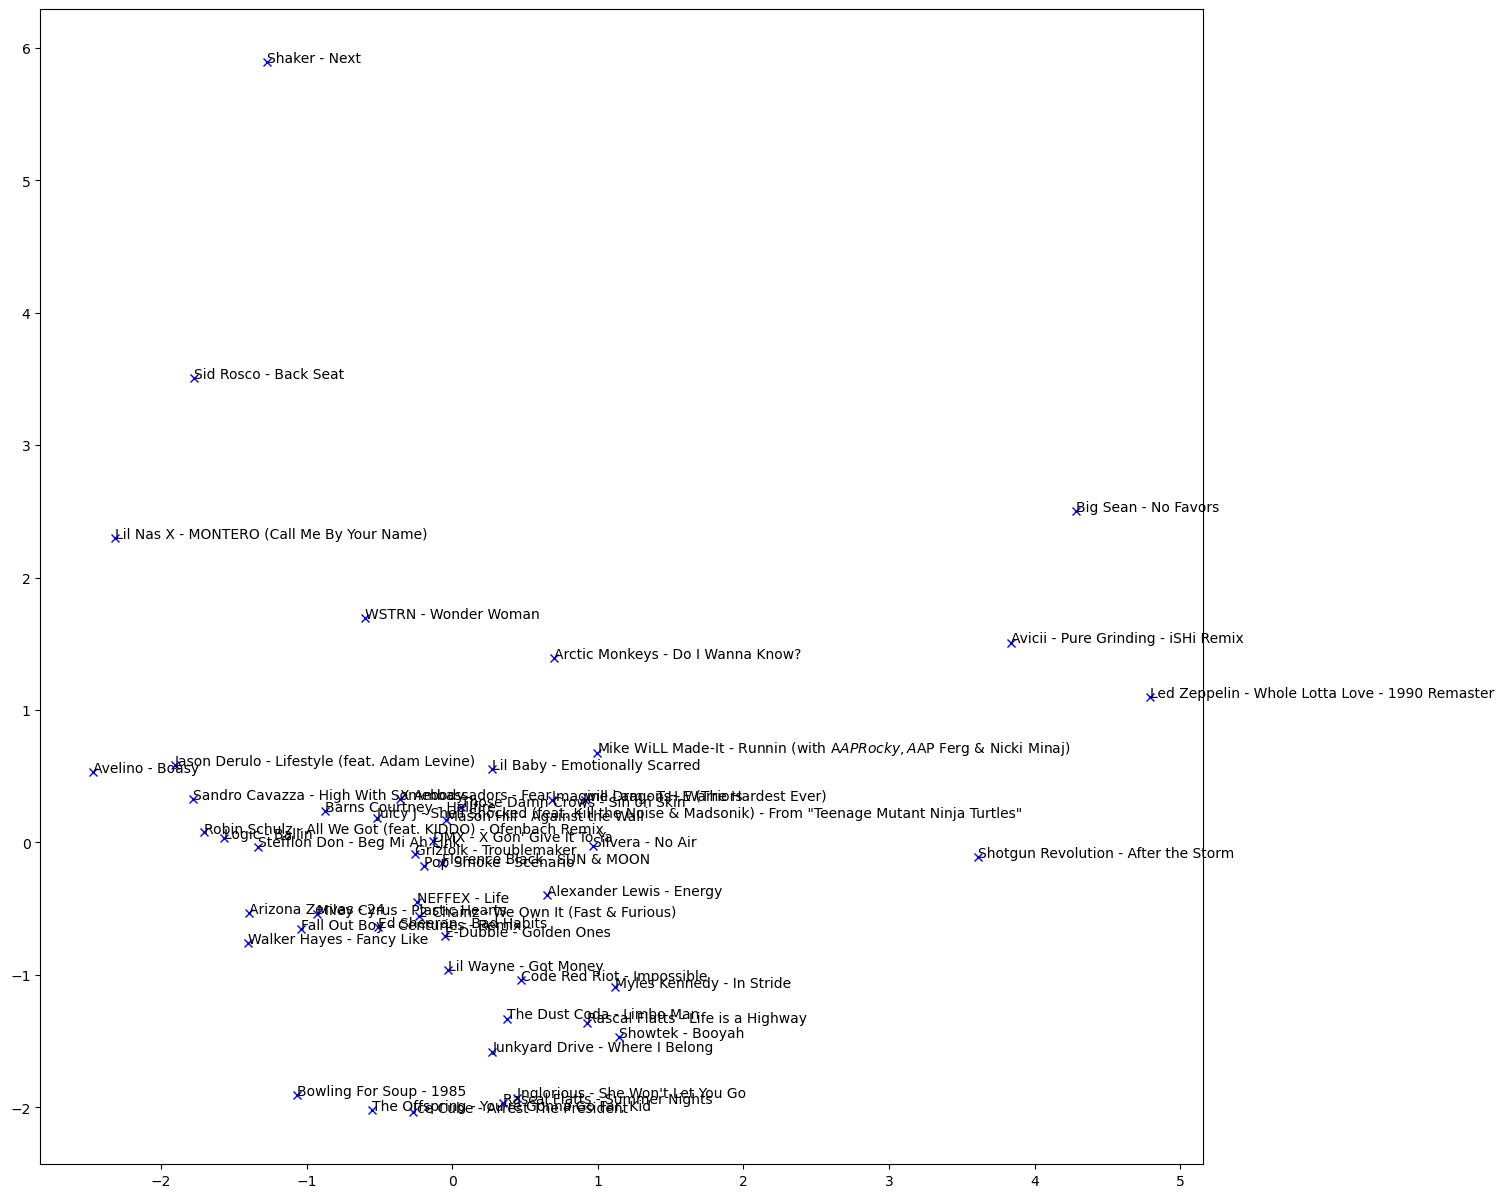

In [38]:
#Plot
plt.figure(figsize=(8, 8))
fig,ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x,y,"bx")
annotations = subset_features.index
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]),alpha=1)